### Light Theme and Dark Theme: Case Study

In [7]:
# Import the  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# import the dataset
df=pd.read_csv('website_ab_test.csv')
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [3]:
# Summary of the dataset
Data_summary= {
    'Number of rows': df.shape[0],
    'Number of columns': df.shape[1],
    'Missing values summary': df.isnull().sum(),
    'Summary of numerical columns': df.describe(),
    'Data types of each column': df.dtypes
}
Data_summary

{'Number of rows': 1000,
 'Number of columns': 10,
 'Missing values summary': Theme                 0
 Click Through Rate    0
 Conversion Rate       0
 Bounce Rate           0
 Scroll_Depth          0
 Age                   0
 Location              0
 Session_Duration      0
 Purchases             0
 Added_to_Cart         0
 dtype: int64,
 'Summary of numerical columns':        Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
 count         1000.000000      1000.000000  1000.000000   1000.000000   
 mean             0.256048         0.253312     0.505758     50.319494   
 std              0.139265         0.139092     0.172195     16.895269   
 min              0.010767         0.010881     0.200720     20.011738   
 25%              0.140794         0.131564     0.353609     35.655167   
 50%              0.253715         0.252823     0.514049     51.130712   
 75%              0.370674         0.373040     0.648557     64.666258   
 max              0.499989        

From the above we can summarise our data thus:
Click through rate ranges between 0.010767 and 0.499989, mean of  0.256048
Conversion Rate between 0.010881 and 0.498916 mean of  0.253312
Bounce Rate 0.200720 and  0.799658  mean of 0.505758
Scroll_Depth 20.011738, 79.997108 mean of 50.319494
Age 18.000000, 65.000000  mean of 41.528000
Session_Duration 38.000000,1797.000000  mean of 924.999000

In [4]:
# To identify our metrics

df_numerical=df[['Theme','Click Through Rate', 'Conversion Rate', 'Bounce Rate', 'Scroll_Depth','Age', 'Session_Duration']] # To select the numerical columns for aggregations

Theme_performance=df_numerical.groupby('Theme').mean() #Group by theme

Theme_performance_sorted= Theme_performance.sort_values(by='Conversion Rate',ascending=False) #Sort the values in descending order
print(Theme_performance_sorted)

             Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
Theme                                                                         
Light Theme            0.247109         0.255459     0.499035     50.735232   
Dark Theme             0.264501         0.251282     0.512115     49.926404   

                   Age  Session_Duration  
Theme                                     
Light Theme  41.734568        930.833333  
Dark Theme   41.332685        919.482490  


From the comparison of both themes we can note that:

Firstly, we define our null hypothesis and our alternative hypothesis
* Null hypothesis:There is no difference in Conversion Rate between the Light team and Dark theme.
    
* Alternative hypothesis:There is a differnece in Conversion Rate between the Light team and Dark theme.

# Then we choose
--for this test we will be using a right tailed test.

In [24]:
# We extract the conversion rate in the light team and dark team
Conversion_rate_light= df[df['Theme']=='Light Theme']['Conversion Rate']
Conversion_rate_dark= df[df['Theme']=='Dark Theme']['Conversion Rate']

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(Conversion_rate_light, Conversion_rate_dark, equal_var=False)

t_stat, p_value

(0.4748494462782632, 0.6349982678451778)

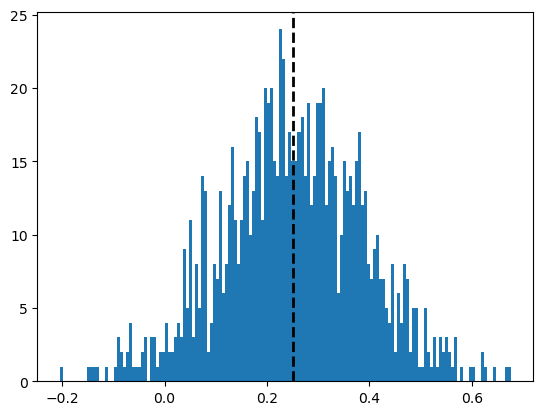

In [17]:
#We create a bar plot to check if the metrics selected is normally distributed
mean=0.253312
standard_deviation= 0.139092
size=1000

# Creating a normal distribution data
values = np.random.normal(mean, standard_deviation, size)
# plotting our histogram
plt.hist(values, 150)
# plotting our mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

In [19]:
#From our plot above we can say that our data is normally distributed.
#Next we choose a significance level.
alpha=0.05

from scipy.stats import norm

In [21]:
mean=0.253312
standard_deviation= 0.139092
size=1000

sample_mean=np.mean(df_numerical['Conversion Rate'])
sample_size=len(df_numerical)
print(sample_mean)
print(sample_size)
# Calculate the zscore
numerator=sample_mean-mean
denominator=standard_deviation/np.sqrt(sample_size)

z_score=numerator/denominator

0.2533121625564122
1000
